In [199]:
import itertools
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [200]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f"x_train shape: {x_train.shape} x_test shape: {x_test.shape}")

x_train shape: (398, 30) x_test shape: (171, 30)


In [201]:
clf = KNeighborsClassifier()
param_range = range(1, 30)
kf = KFold(n_splits=10, shuffle=False)

# the training scores are a result of validating the training portion of each fold using the model (during cross-validation)
# the test scores are a result of validating the non-training portion of each fold using the model (during cross-validation)
train_scores_matrix, test_scores_matrix = validation_curve(clf, x_train, y_train, param_range=param_range, param_name="n_neighbors", cv=kf, n_jobs=-1, scoring="accuracy")

train_mean = np.mean(train_scores_matrix, axis=1)
train_std = np.std(train_scores_matrix, axis=1)
test_mean = np.mean(test_scores_matrix, axis=1)
test_std = np.std(test_scores_matrix, axis=1)

test_max = np.max(test_scores_matrix, axis=1)
test_min = np.min(test_scores_matrix, axis=1)

print(f"train_mean: {train_mean}%")
print(f"train_std: {train_std}%")
print(f"test_mean: {test_mean}%")
print(f"test_std: {test_std}%")
print(f"test_min: {test_min}")
print(f"test_max: {test_max}")

train_mean: [1.         0.96398515 0.94416442 0.93411478 0.9254579  0.92825197
 0.93160159 0.93076049 0.92378348 0.92936696 0.92071396 0.92657522
 0.92015375 0.92573723 0.91876099 0.92071163 0.91485193 0.91624936
 0.91457338 0.91373539 0.91178008 0.91289585 0.91233797 0.91317595
 0.91066432 0.91150153 0.90870824 0.91066354 0.91038421]%
train_std: [0.         0.00405    0.0028087  0.0051814  0.00576328 0.00500944
 0.0054877  0.00729967 0.00730936 0.00533328 0.00437429 0.00454457
 0.00591825 0.00403372 0.003618   0.00507173 0.00547988 0.00512442
 0.00486016 0.00383785 0.00534448 0.00661087 0.00629048 0.00508293
 0.00450419 0.00434353 0.00548303 0.00501122 0.0061908 ]%
test_mean: [0.89935897 0.89435897 0.90442308 0.89429487 0.90185897 0.91198718
 0.90942308 0.90935897 0.90692308 0.90435897 0.90698718 0.91192308
 0.91448718 0.91448718 0.90698718 0.90442308 0.90442308 0.90692308
 0.90948718 0.90692308 0.90442308 0.90942308 0.90692308 0.90692308
 0.90692308 0.90942308 0.90442308 0.90692308 0

#### Plotting the Validation Curve

best n_neighbors: 13


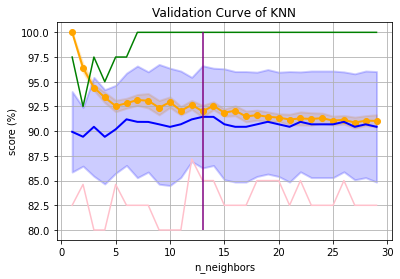

In [202]:
plt.title("Validation Curve of KNN")
plt.xlabel("n_neighbors")
plt.ylabel("score (%)")
plt.grid()

train_mean_pcn = train_mean*100
test_mean_pcn = test_mean*100
train_std_pcn = train_std*100
test_std_pcn = test_std*100
test_min_pcn = test_min*100
test_max_pcn = test_max*100

plt.plot(param_range, train_mean_pcn, label="Training Score", color="orange", lw=2, marker="o")
plt.plot(param_range, test_mean_pcn, label="Testing Score", color="blue", lw=2)

plt.fill_between(param_range, train_mean_pcn-train_std_pcn, train_mean_pcn+train_std_pcn, color="orange", alpha=0.2, lw=2)

plt.fill_between(param_range, test_mean_pcn-test_std_pcn, test_mean_pcn+test_std_pcn, color="blue", alpha=0.2, lw=2)

plt.plot(param_range, test_min_pcn, color="pink")
plt.plot(param_range, test_max_pcn, color="green")

test_mean_max = np.max(test_mean_pcn)
test_mean_max_idcs = np.where(test_mean_pcn == test_mean_max)
if len(test_mean_max_idcs)!=0 and len(test_mean_max_idcs[0] != 0): # only if found
    first_idx = test_mean_max_idcs[0][0]
    n_neighbor = param_range[first_idx]
    plt.vlines(n_neighbor, 80, 100, color="purple")
    # plt.scatter(x=n_neighbor, y=test_mean_max, s=100, marker="*", color="red")
    print(f"best n_neighbors: {n_neighbor}")

plt.show()